# Question 1
# Toyota Corolla Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# import Dataset
toyota=pd.read_csv(r"C:\Users\Asus\Downloads\ToyotaCorolla.csv",encoding='latin1')
toyota

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyota.info

<bound method DataFrame.info of         Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         1

In [5]:
toyota2=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota2

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [6]:
toyota3=toyota2.rename({'Age_08_04':'AGE','cc':'CC','Quarterly_tax':'QT'} ,axis=1)
toyota3

Price  AGE     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1431   7500   69  20544   86  1300      3      5             69    1025
1432  10845   72  19000   86  1300      3      5             69    1015
1433   8500   71  17016   86  1300      3      5             69    1015
1434   7250   70  16916   86  1300      3      5             69    1015
1435   6950   76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [7]:
toyota3[toyota3.duplicated()]

Price  AGE     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
113  24950    8  13253  116  2000      5      5            234    1320

In [8]:
toyota4=toyota3.drop_duplicates().reset_index(drop=True)
toyota4

Price  AGE     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1430   7500   69  20544   86  1300      3      5             69    1025
1431  10845   72  19000   86  1300      3      5             69    1015
1432   8500   71  17016   86  1300      3      5             69    1015
1433   7250   70  16916   86  1300      3      5             69    1015
1434   6950   76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [9]:
 toyota4.describe()

Price          AGE             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears  Quarterly_Tax       Weight  
count  1435.000000  1435.000000    1435.000000  1435.000000  
mean      4.032753     5.026481      87.020209  1072.287108  
std       0.952667     0.188575      40.959588    52.251882  
min       2.000000     3.000000      19.000000  1000.000000  
25%       3.000000     5.000000      69.000000  1040.000000  
50%       4.000000     5.000000      85.000000  1070.000000  
75%       5.000000     5.000000      85.000000  1085.000000  
max       5.000000     6.000000     283.000000  1615.000000

In [10]:
# finding the correlation
toyota4.corr()

Price       AGE        KM        HP        CC     Doors  \
Price          1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604   
AGE           -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929   
KM            -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193   
HP             0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803   
CC             0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254   
Doors          0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000   
Gears          0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101   
Quarterly_Tax  0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353   
Weight         0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734   

                  Gears  Quarterly_Tax    Weight  
Price          0.063831       0.211508  0.575869  
AGE           -0.005629      -0.193319 -0.466484  
KM             0.014890       0.283312 -0.023969  
HP             0.209642      -0.302287  0.087143  
CC             0.014732       0.305982  0.335077  
Doors         -0.160101       0.107353  0.301734  
Gears          1.000000      -0.005125  0.021238  
Quarterly_Tax -0.005125       1.000000  0.621988  
Weight         0.021238       0.621988  1.000000

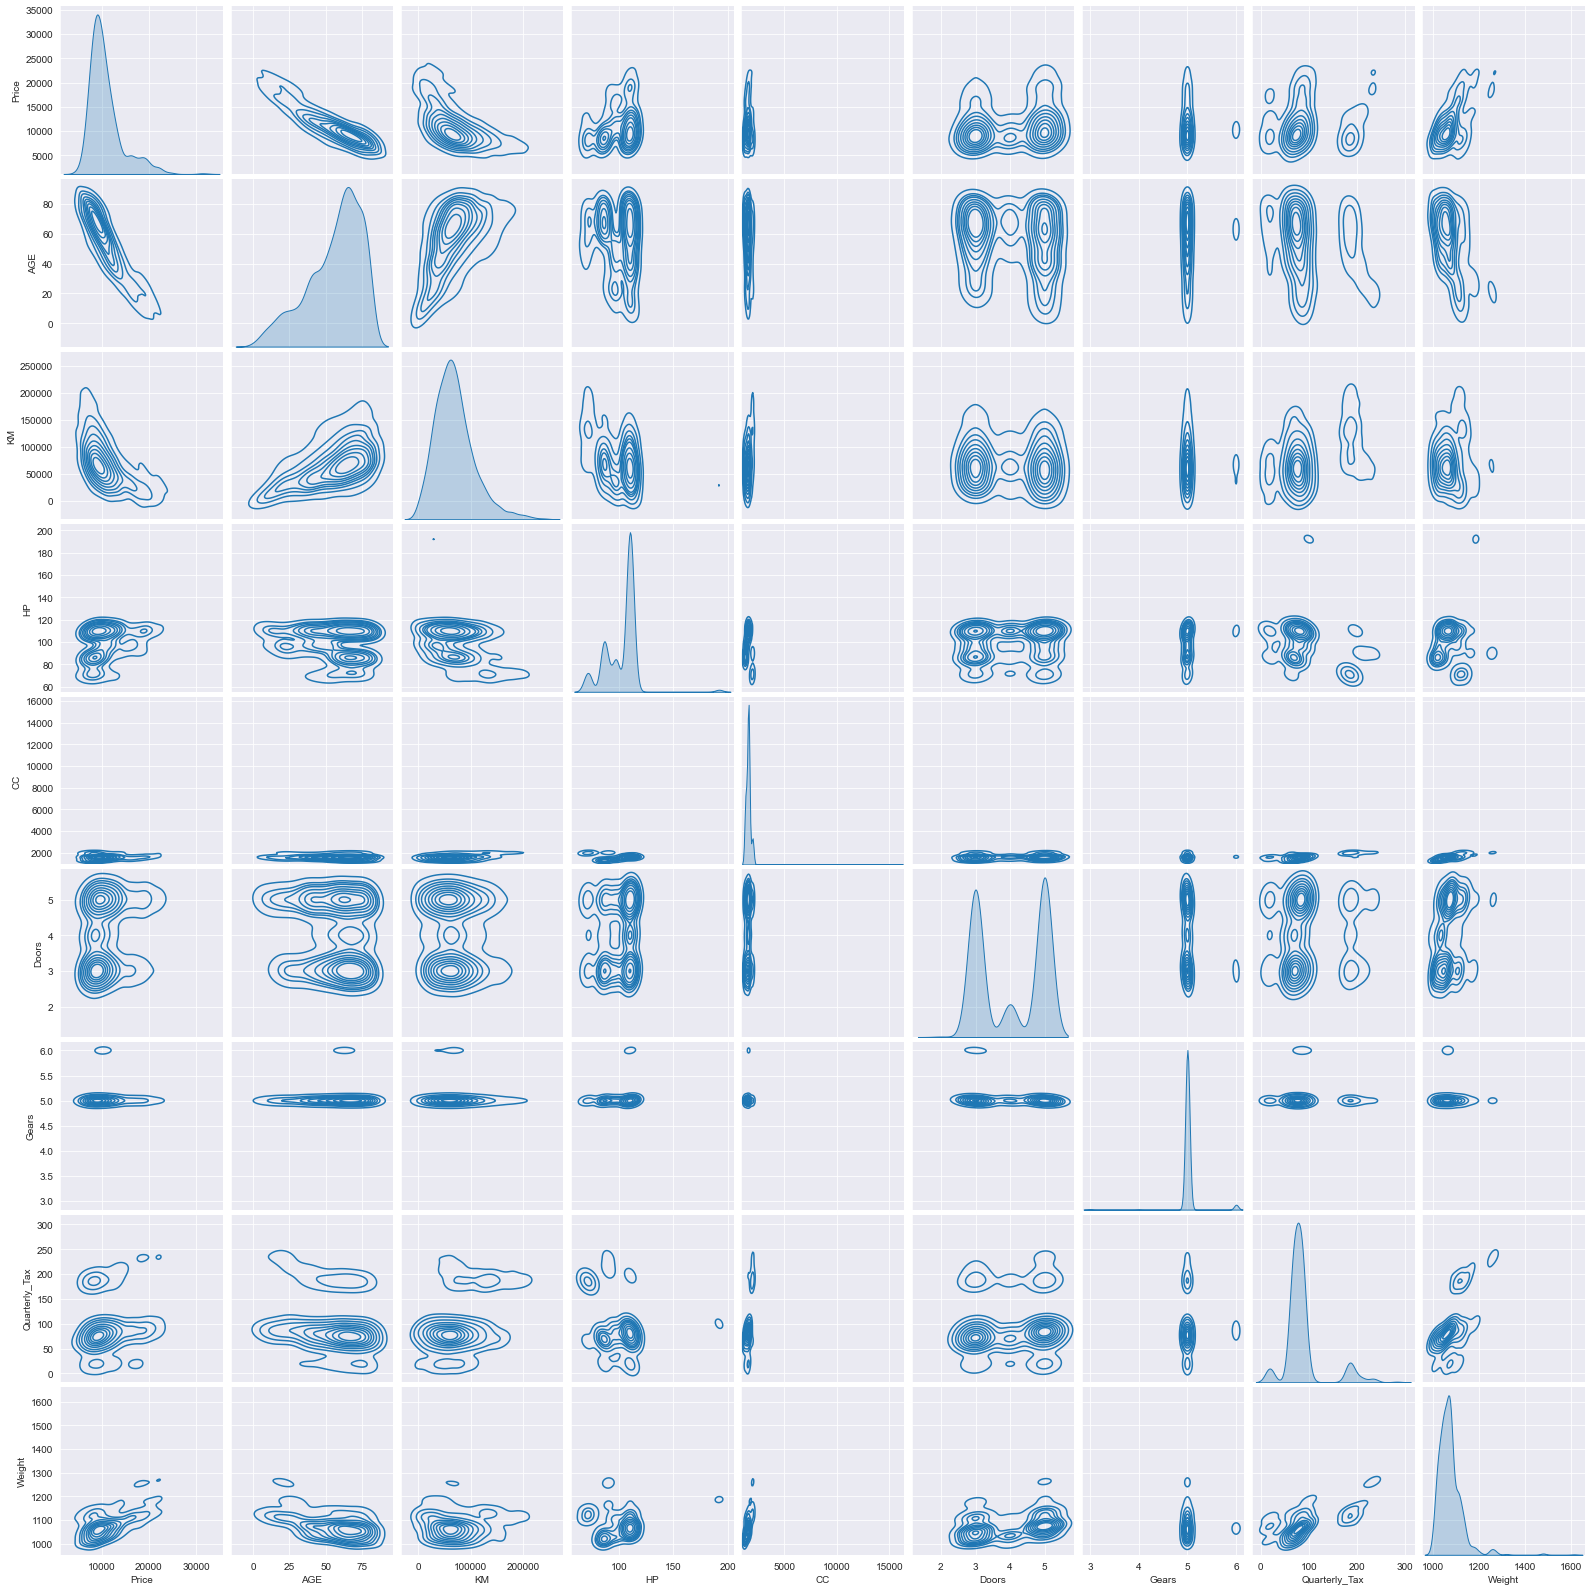

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota4,kind='kde')
plt.show()

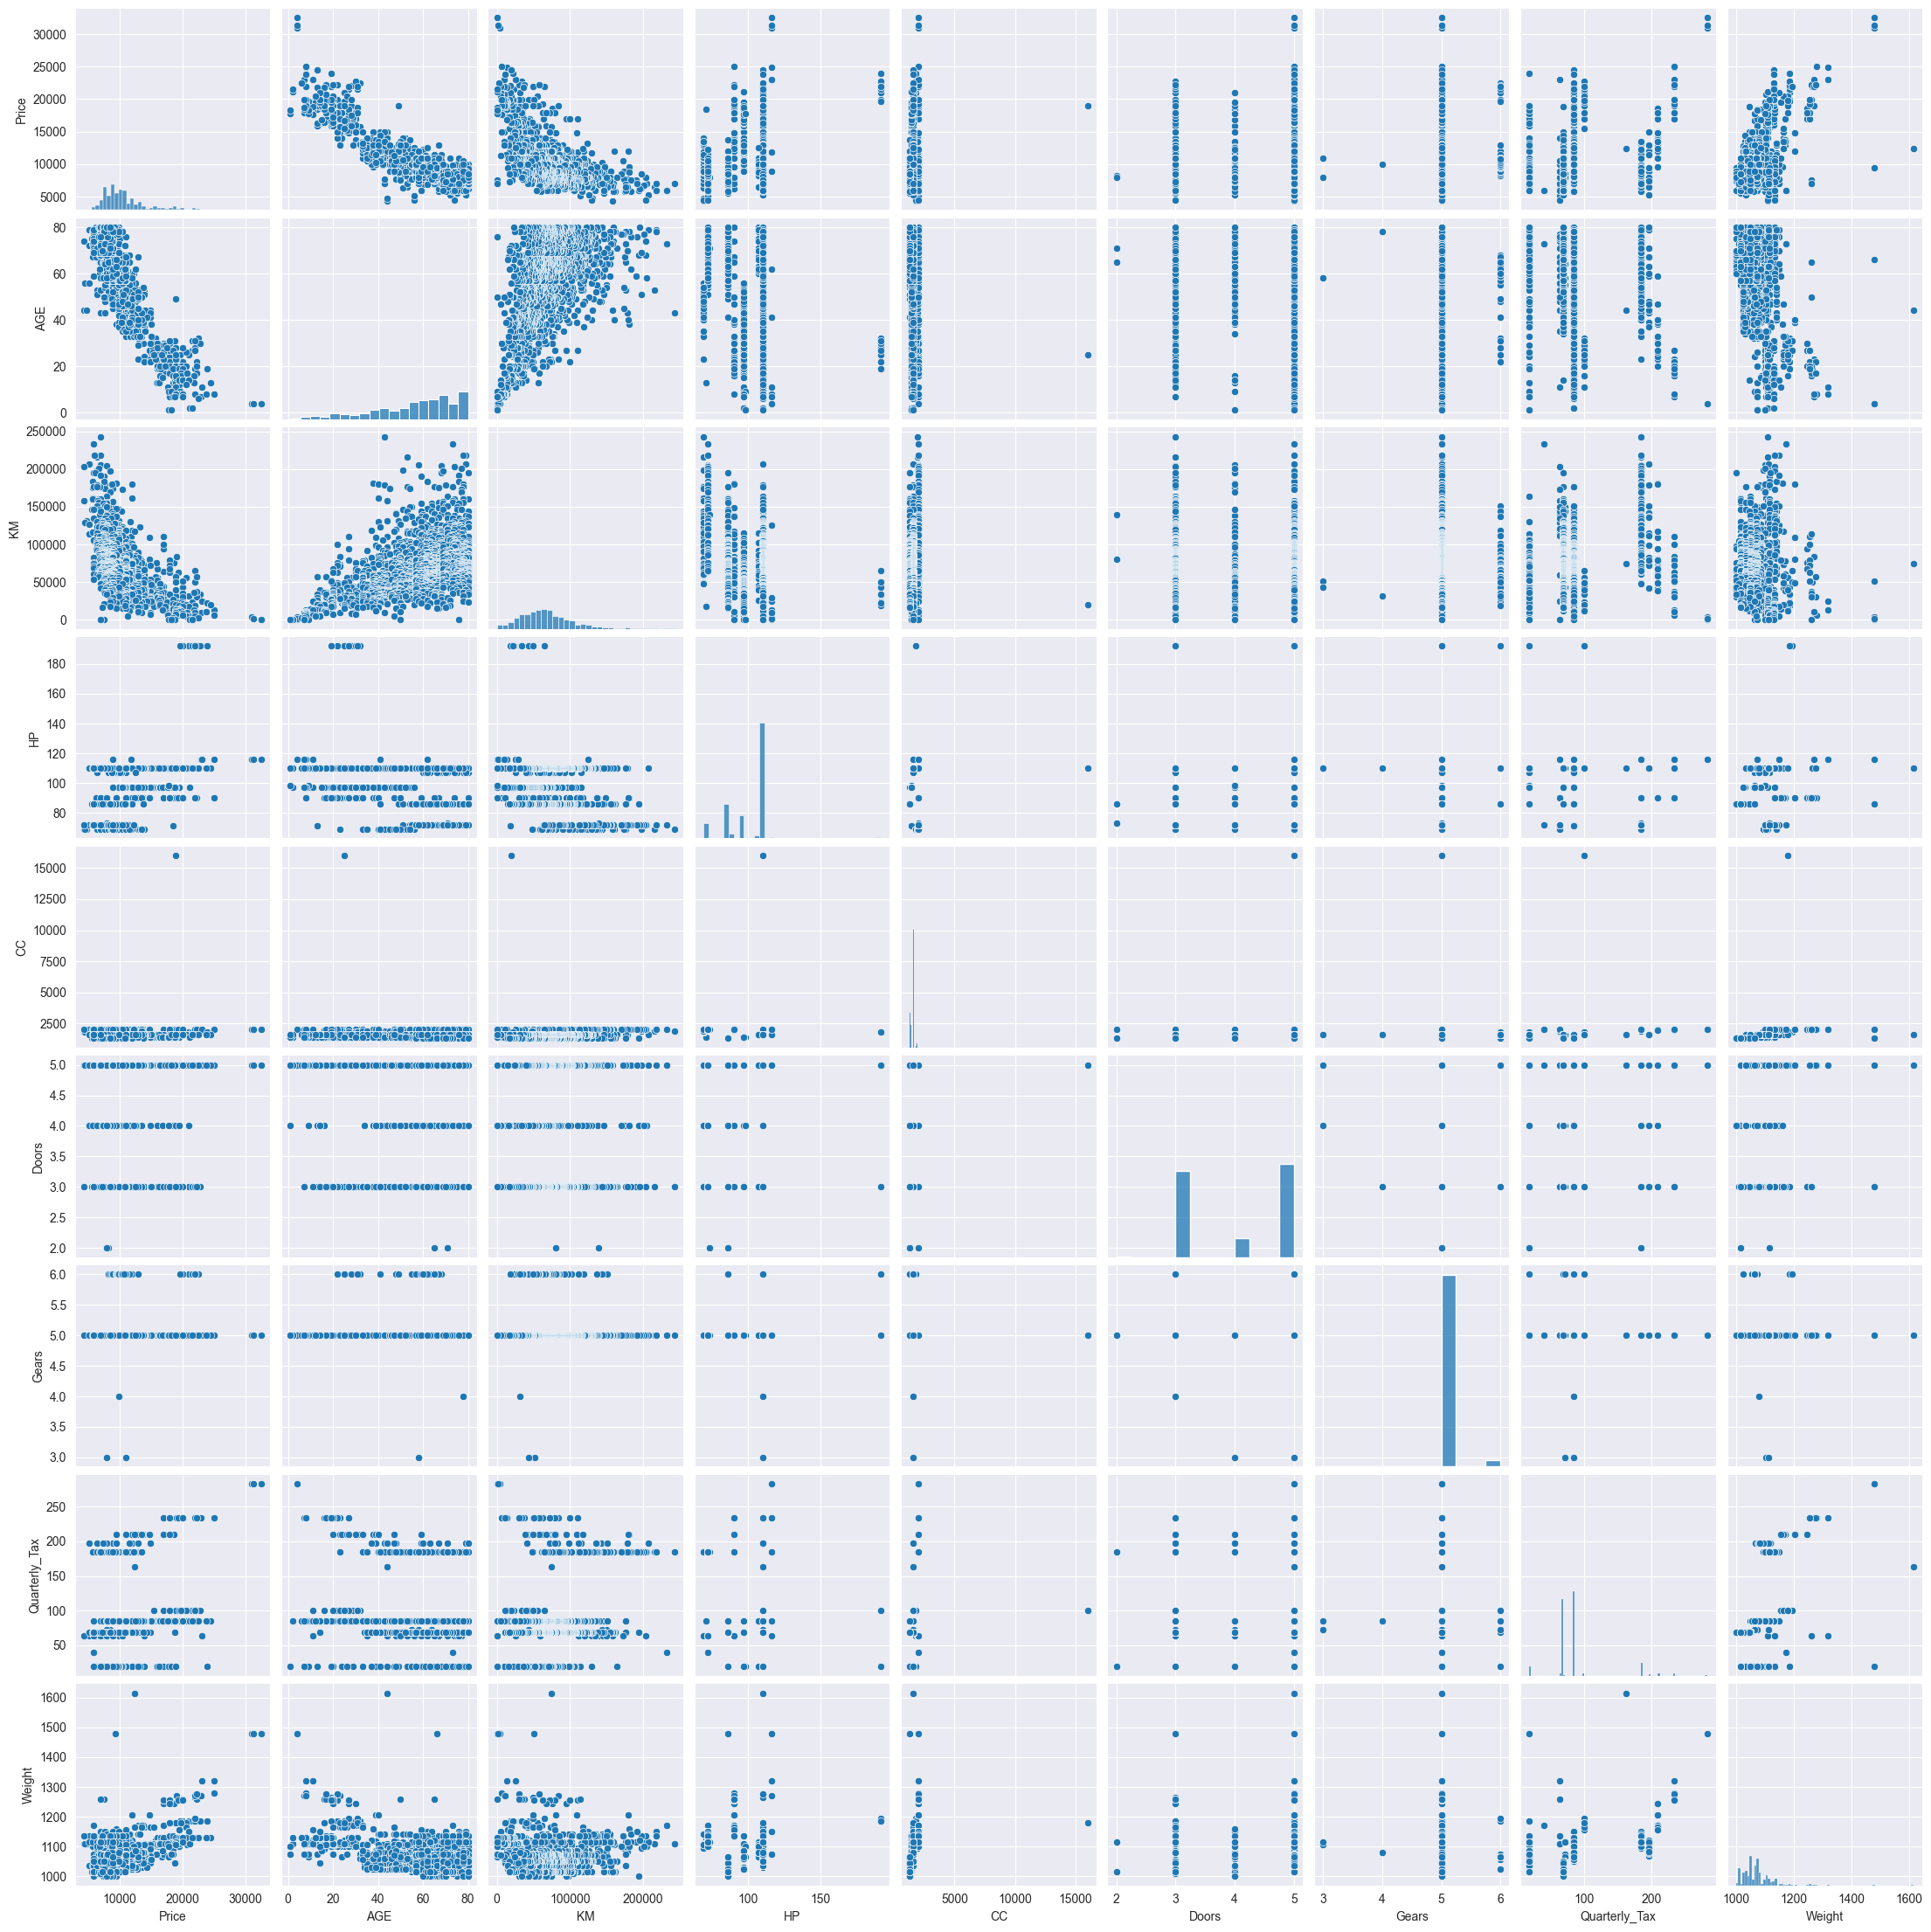

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota4,palette='bright')
plt.show()

<AxesSubplot: >

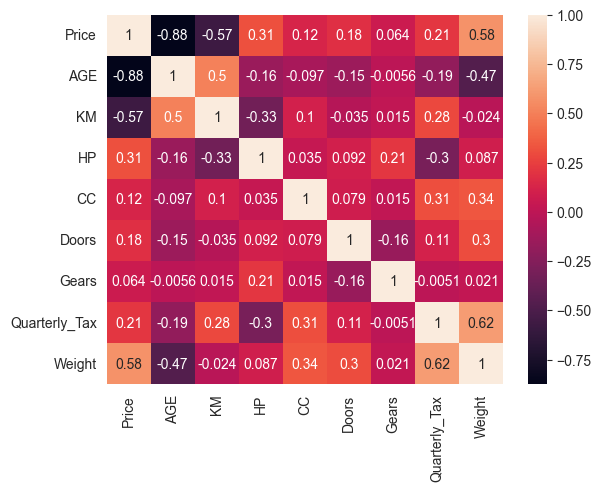

In [13]:
corrMatrix=toyota4.corr()
sns.heatmap(corrMatrix,annot=True)

## between age and price has highly negative correlation , KM and price has negative correlation 

In [14]:
model=smf.ols('Price~AGE+KM+HP+CC+Gears+Quarterly_Tax+Weight',data=toyota4).fit()

In [15]:
# Finding Coefficient parameters
model.params

Intercept       -5473.681155
AGE              -121.713712
KM                 -0.020738
HP                 31.580006
CC                 -0.118524
Gears             598.577251
Quarterly_Tax       3.861054
Weight             16.849284
dtype: float64

In [16]:
# Finding tvalues and pvalues
model.tvalues,np.round(model.pvalues,5)

(Intercept        -3.879831
 AGE             -46.568324
 KM              -16.565951
 HP               11.240407
 CC               -1.316697
 Gears             3.096427
 Quarterly_Tax     2.955175
 Weight           16.283225
 dtype: float64,
 Intercept        0.00011
 AGE              0.00000
 KM               0.00000
 HP               0.00000
 CC               0.18815
 Gears            0.00200
 Quarterly_Tax    0.00318
 Weight           0.00000
 dtype: float64)

In [17]:
#finding R squared value
model.rsquared,model.rsquared_adj

(0.8625199746430149, 0.8618455806854123)

In [18]:
#build SLR and MLR for insignificant variables 'CC' and Doors
#also find their tvalues and pvalues

In [19]:
slr_c=smf.ols('Price~CC',data=toyota4).fit()
slr_c.tvalues,slr_c.pvalues #CC has significant value

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [20]:
slr_d=smf.ols('Price~Doors',data=toyota4).fit()
slr_d.tvalues,slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [21]:
mlr_cd=smf.ols('Price~CC+Doors',data=toyota4).fit()
mlr_cd.tvalues,mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [22]:
# 1)collinearty problem check 
# calculate VIF=1/(1-Rsquare) for all independent variables
rsq_age=smf.ols('AGE~KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~AGE+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota4).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~AGE+KM+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota4).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('CC~AGE+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota4).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_DR=smf.ols('Doors~AGE+KM+HP+CC+Gears+Quarterly_Tax+Weight',data=toyota4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~AGE+KM+HP+CC+Doors+Quarterly_Tax+Weight',data=toyota4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('Quarterly_Tax~AGE+KM+HP+CC+Doors+Gears+Weight',data=toyota4).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_wt=smf.ols('Weight~AGE+KM+HP+CC+Doors+Gears+Quarterly_Tax',data=toyota4).fit().rsquared
vif_wt=1/(1-rsq_wt)
# putting values in dataframe format
d1={'variables':['AGE','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight'],
   'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_DR,vif_GR,vif_QT,vif_wt]}
vif_df=pd.DataFrame(d1)
vif_df


variables       vif
0            AGE  1.876236
1             KM  1.757178
2             HP  1.419180
3             CC  1.163470
4          Doors  1.155890
5          Gears  1.098843
6  Quarterly_Tax  2.295375
7         Weight  2.487180

In [23]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

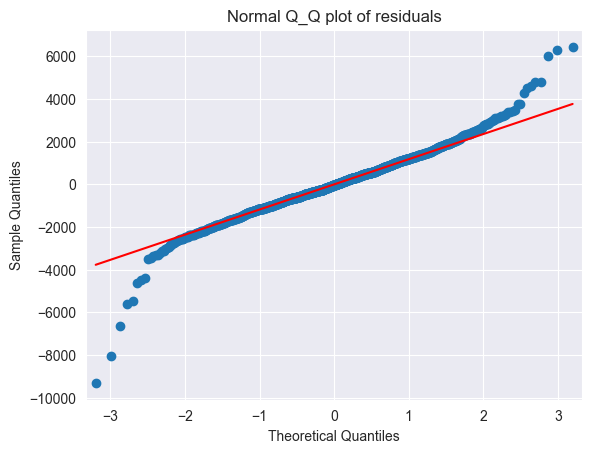

In [24]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q_Q plot of residuals")
plt.show()

In [25]:
list(np.where(model.resid>6000)) # outliar detection from above QQ plot of residuals

[array([109, 146, 522], dtype=int64)]

In [26]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [27]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standard_values(vals): return(vals-vals.mean())/vals.std()

plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()


In [28]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


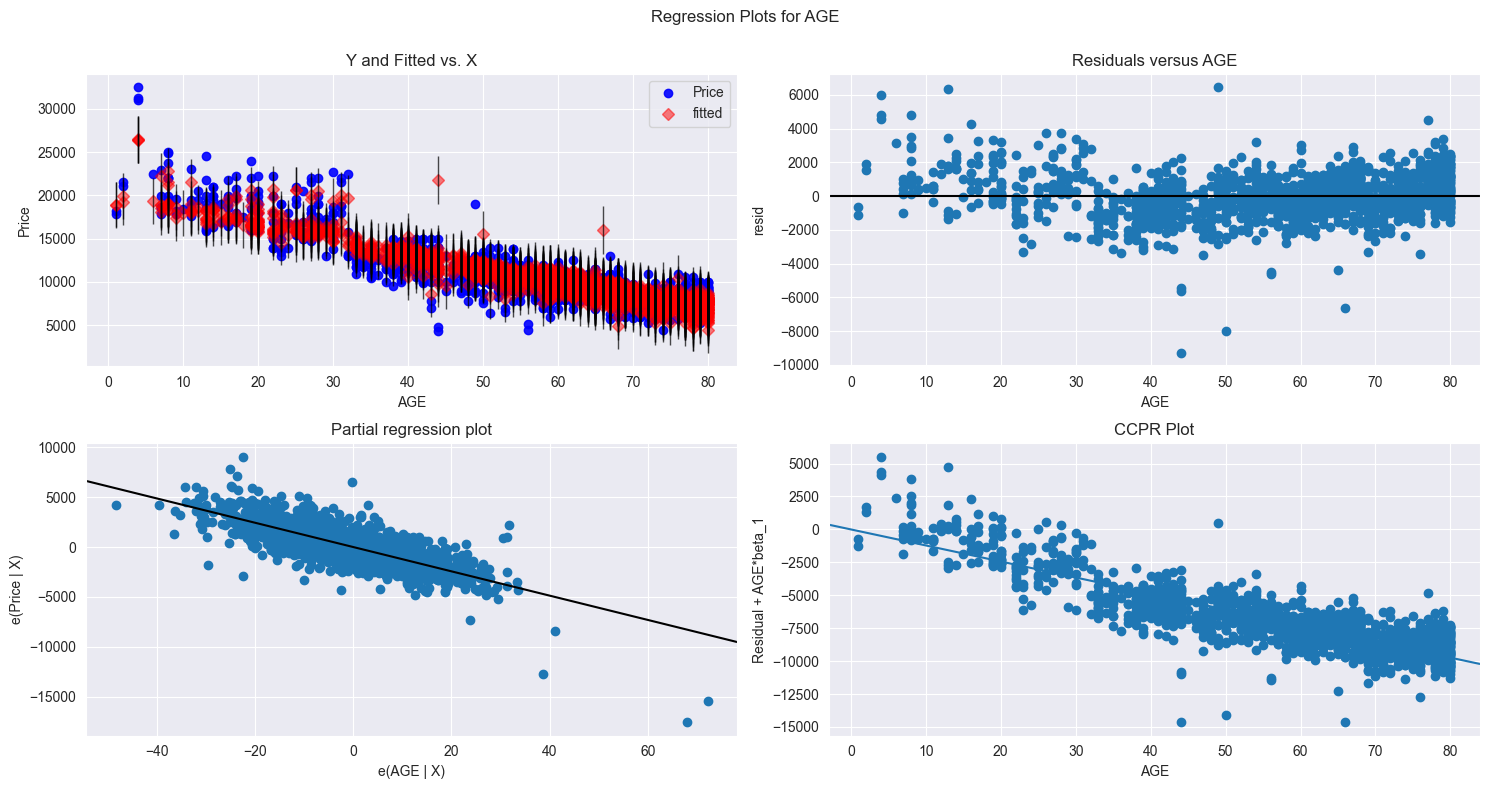

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AGE',fig=fig)
plt.show()

eval_env: 1


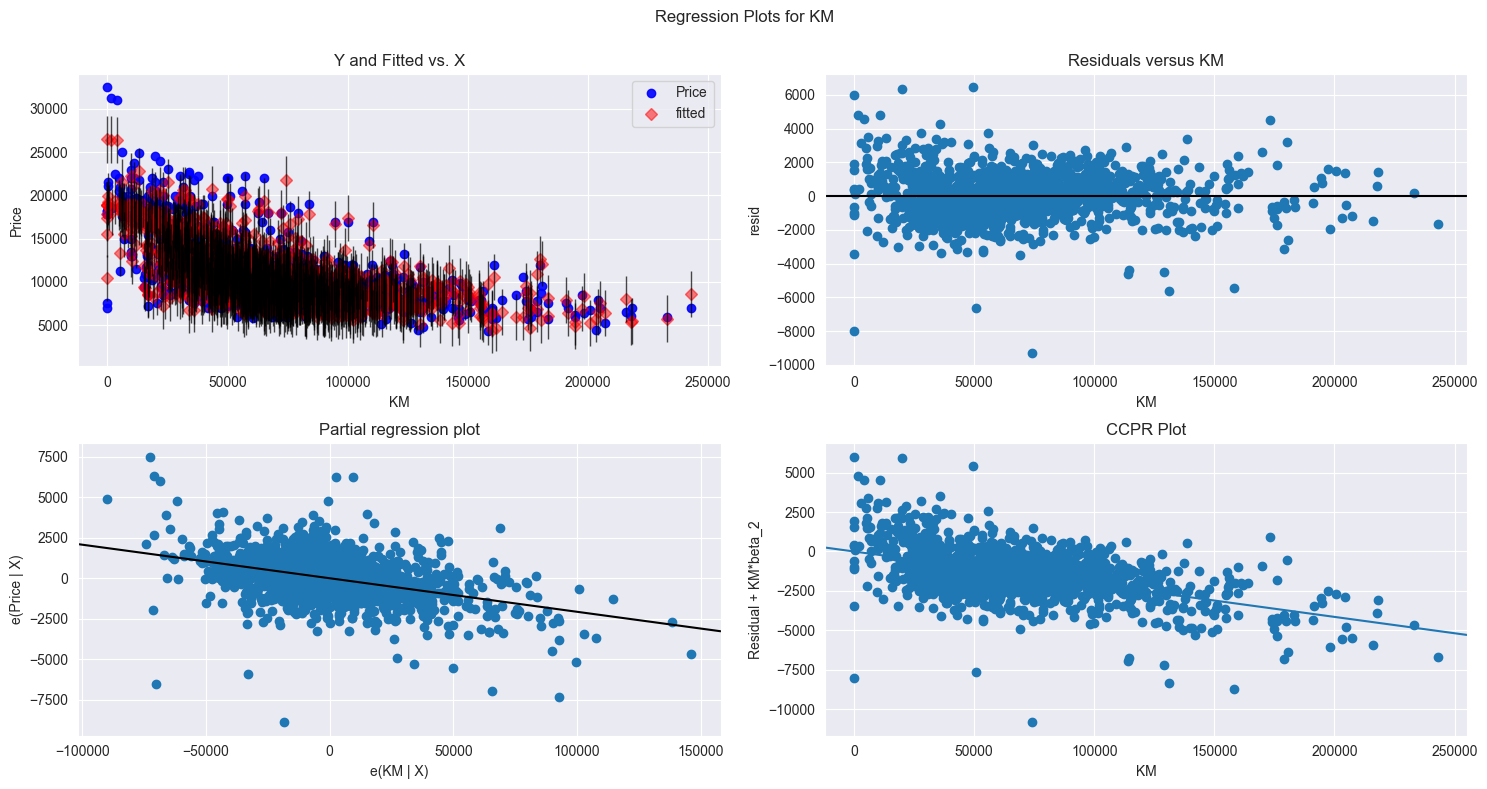

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


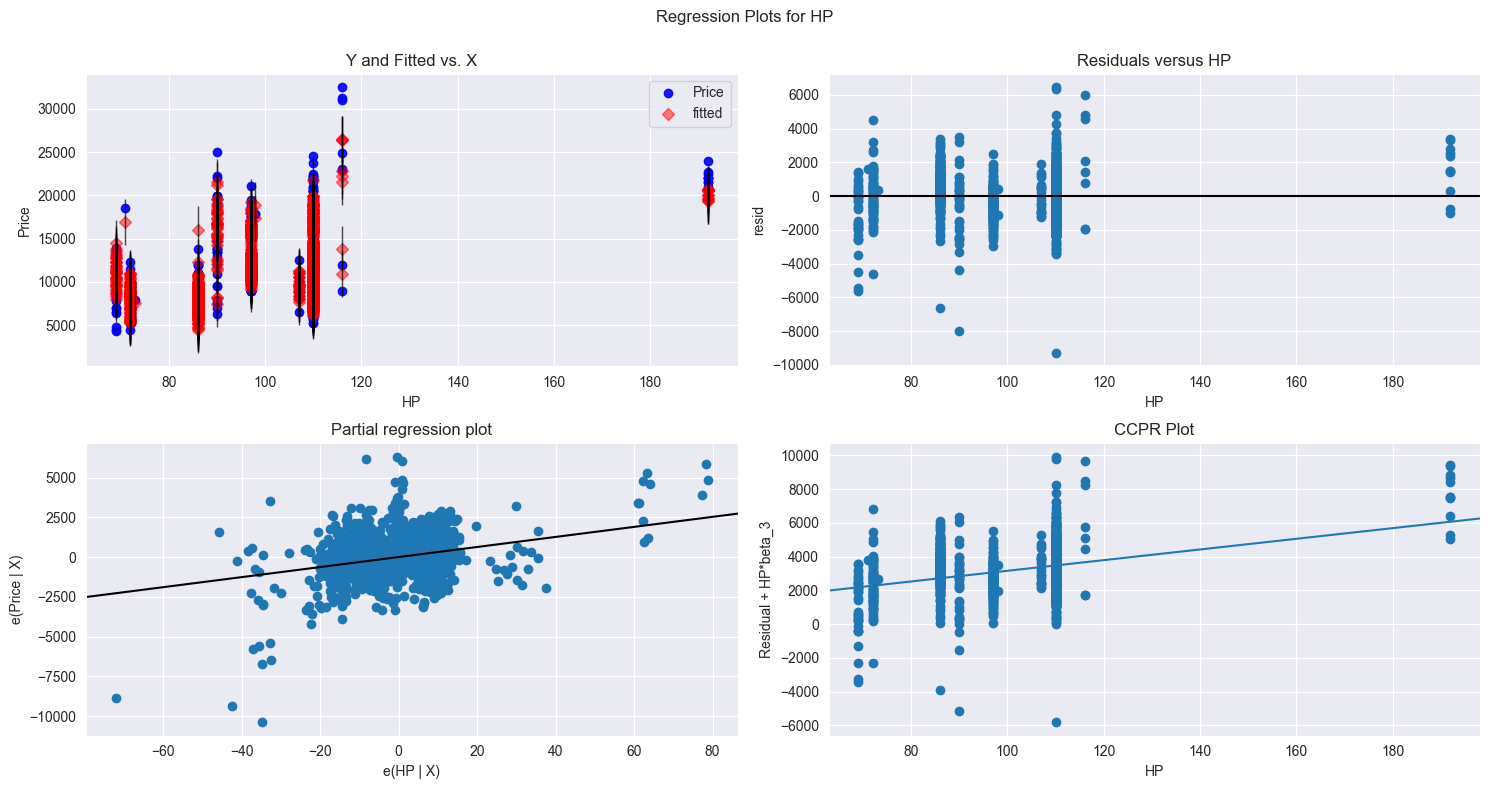

In [31]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


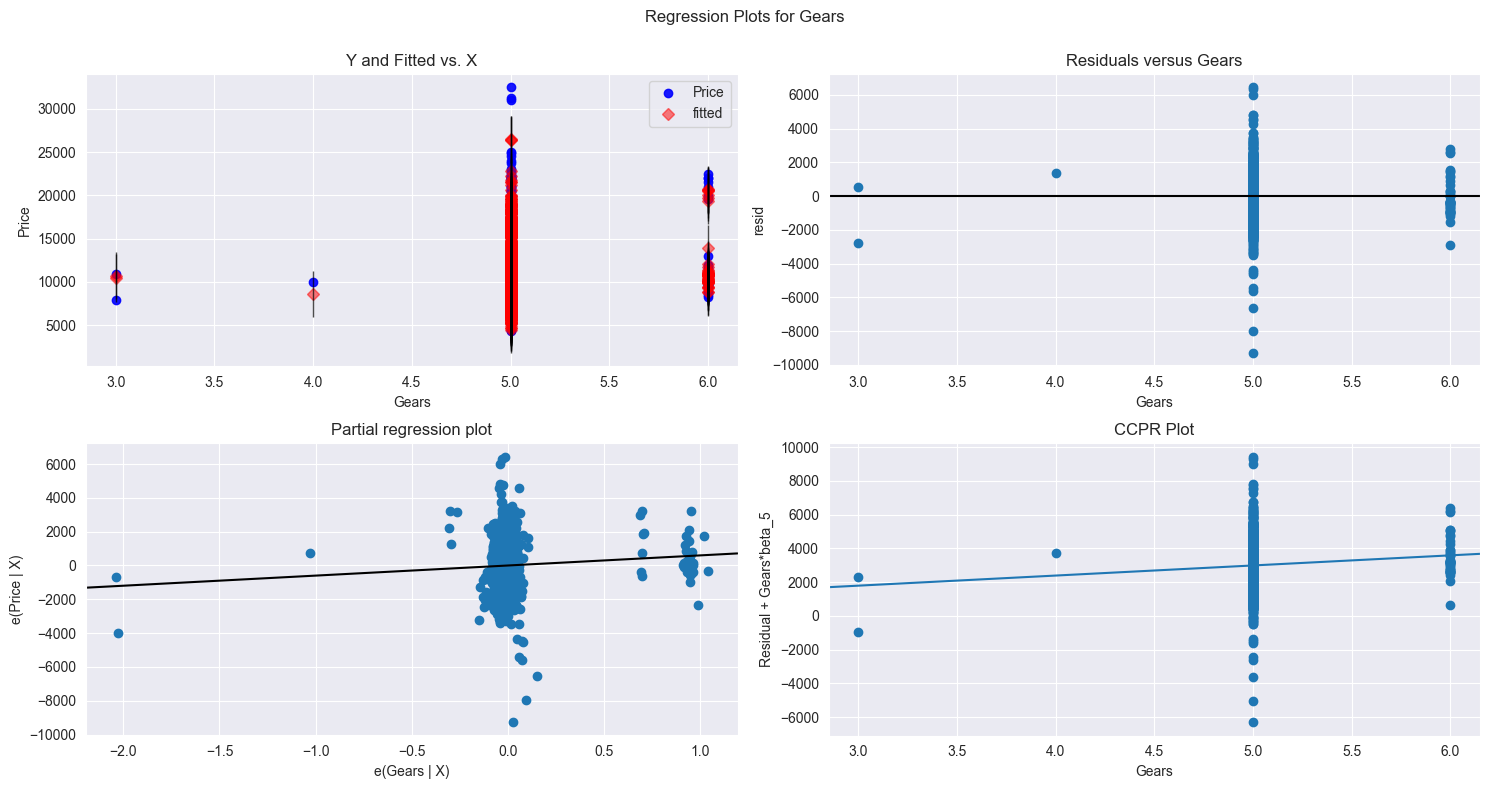

In [32]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


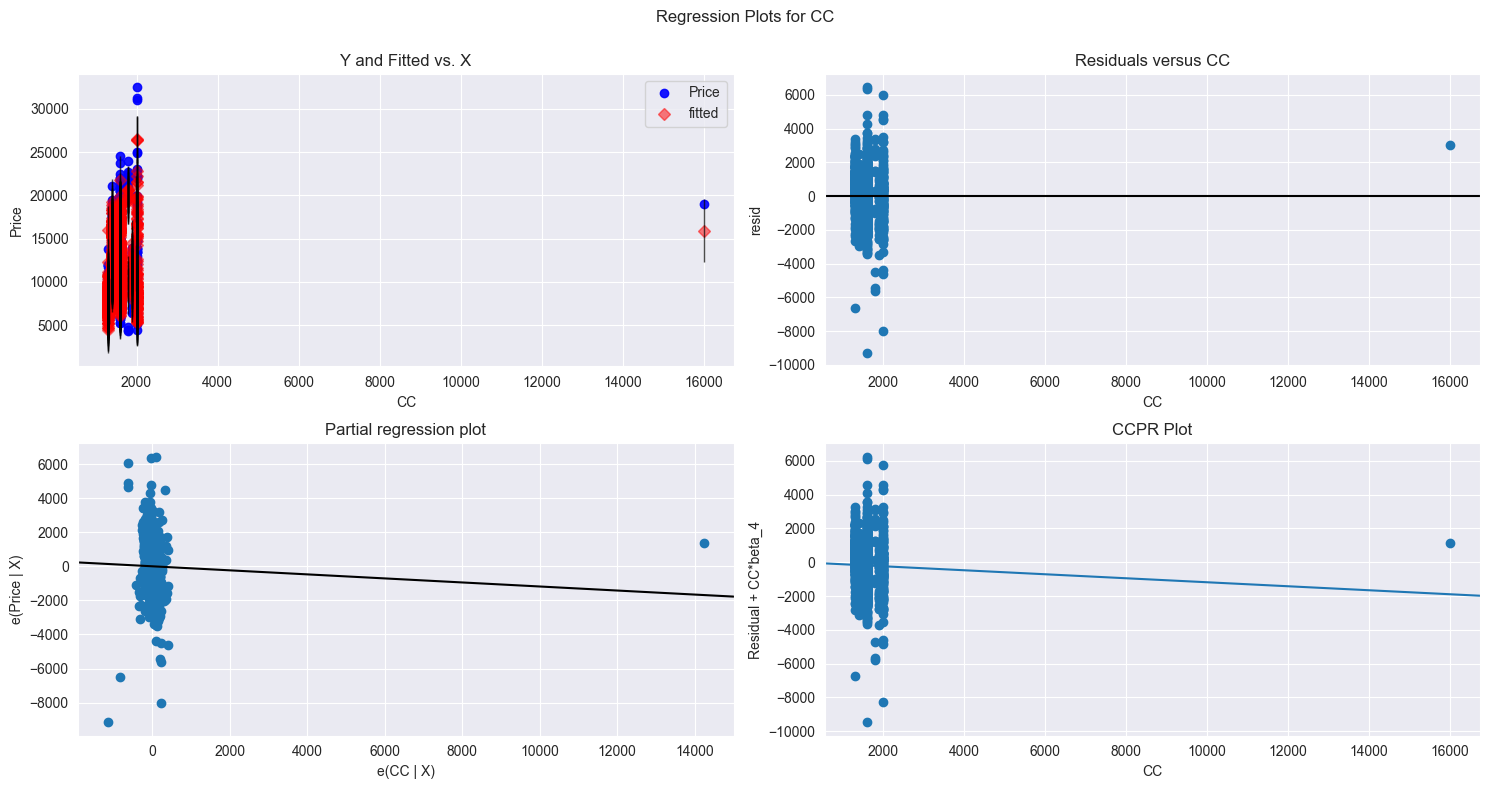

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


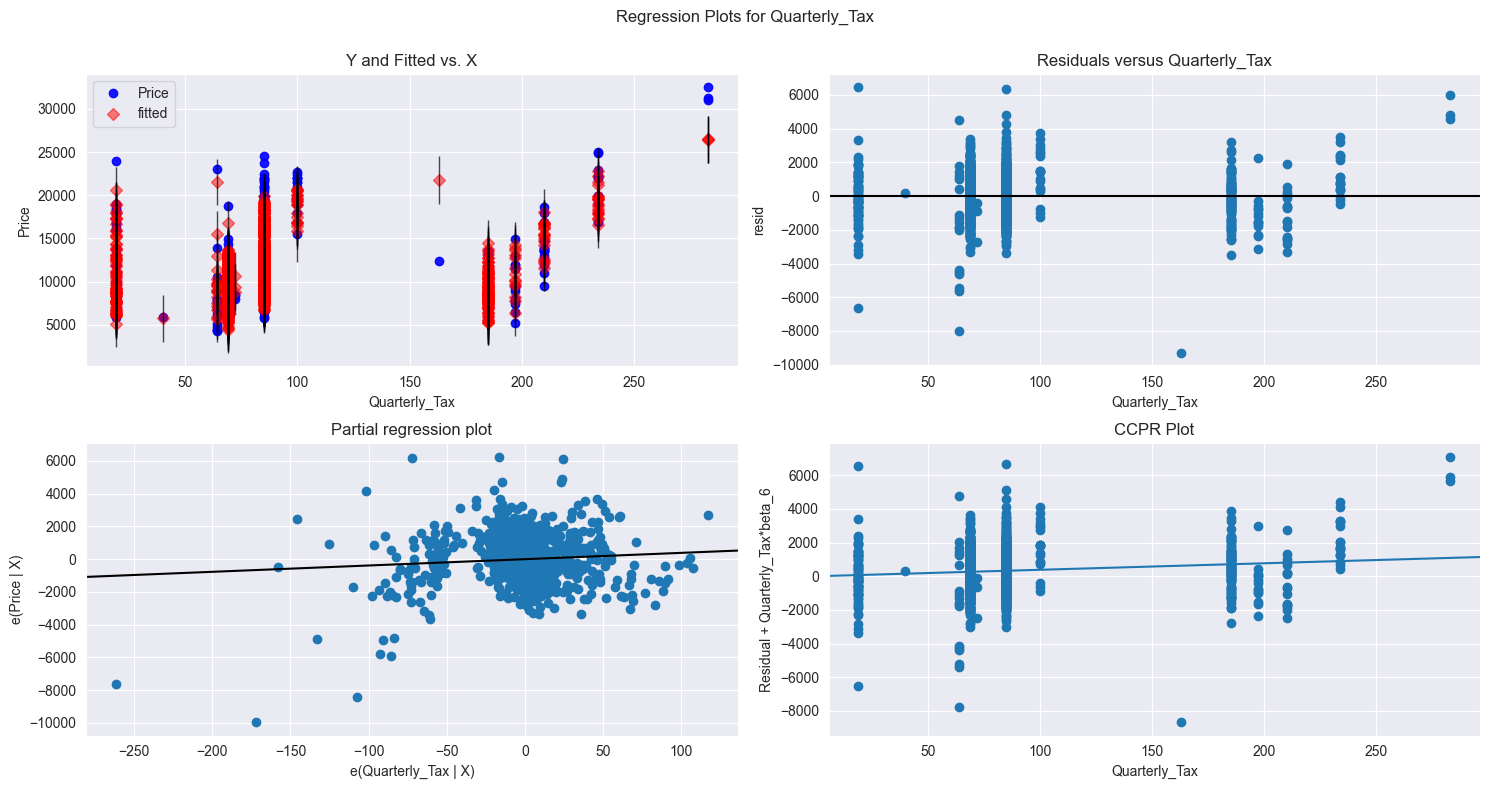

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

eval_env: 1


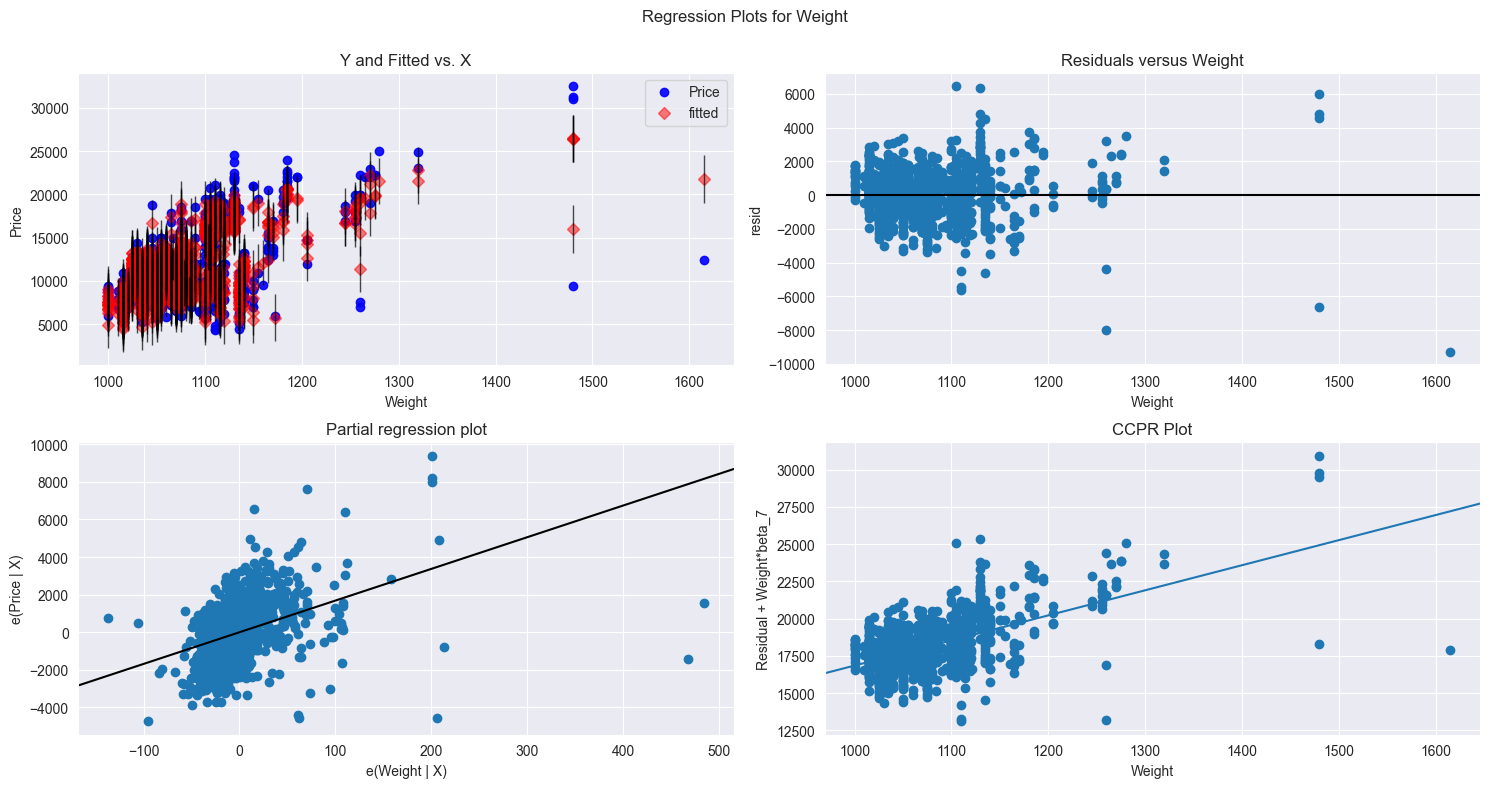

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [36]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([6.96111678e-03, 3.74125127e-03, 5.26792390e-03, ...,
       8.81571446e-07, 7.47160381e-04, 1.19974600e-02])

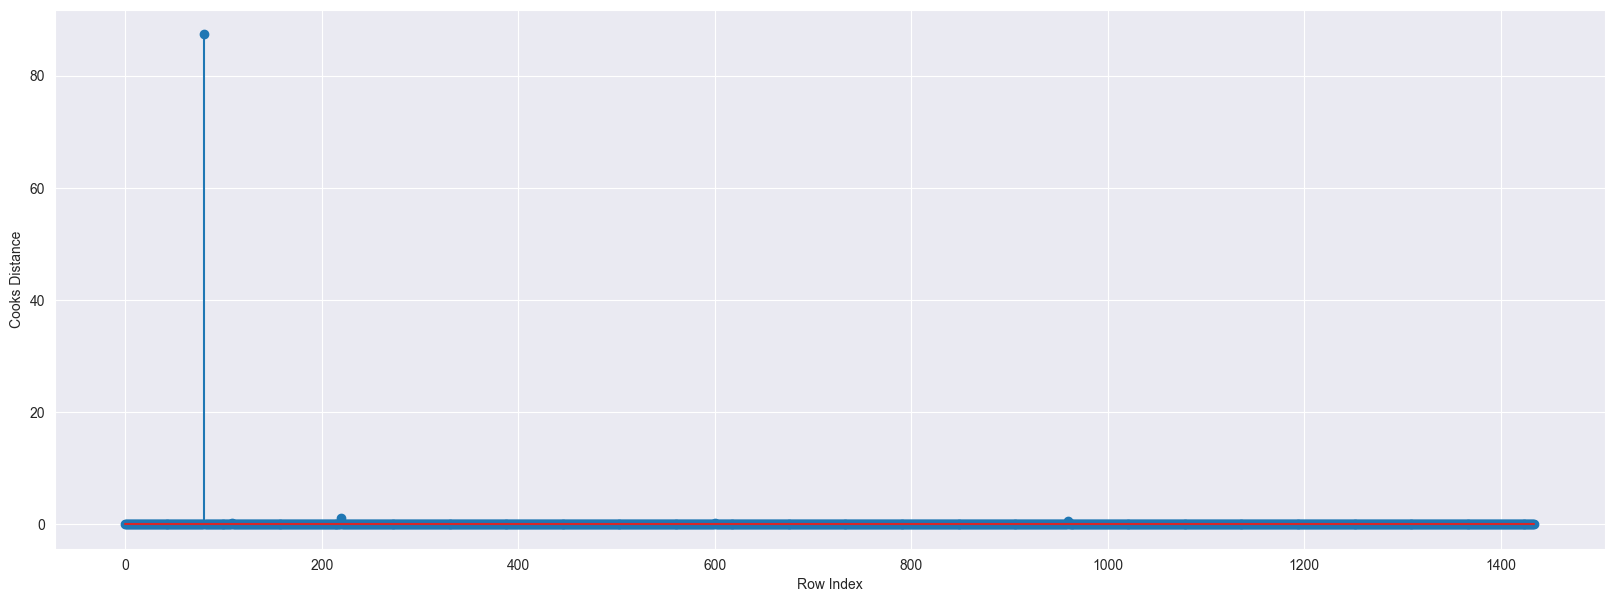

In [37]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
# Index and value of influencer where C>0.5
np.argmax(c),np.max(c)

(80, 87.40014550948943)

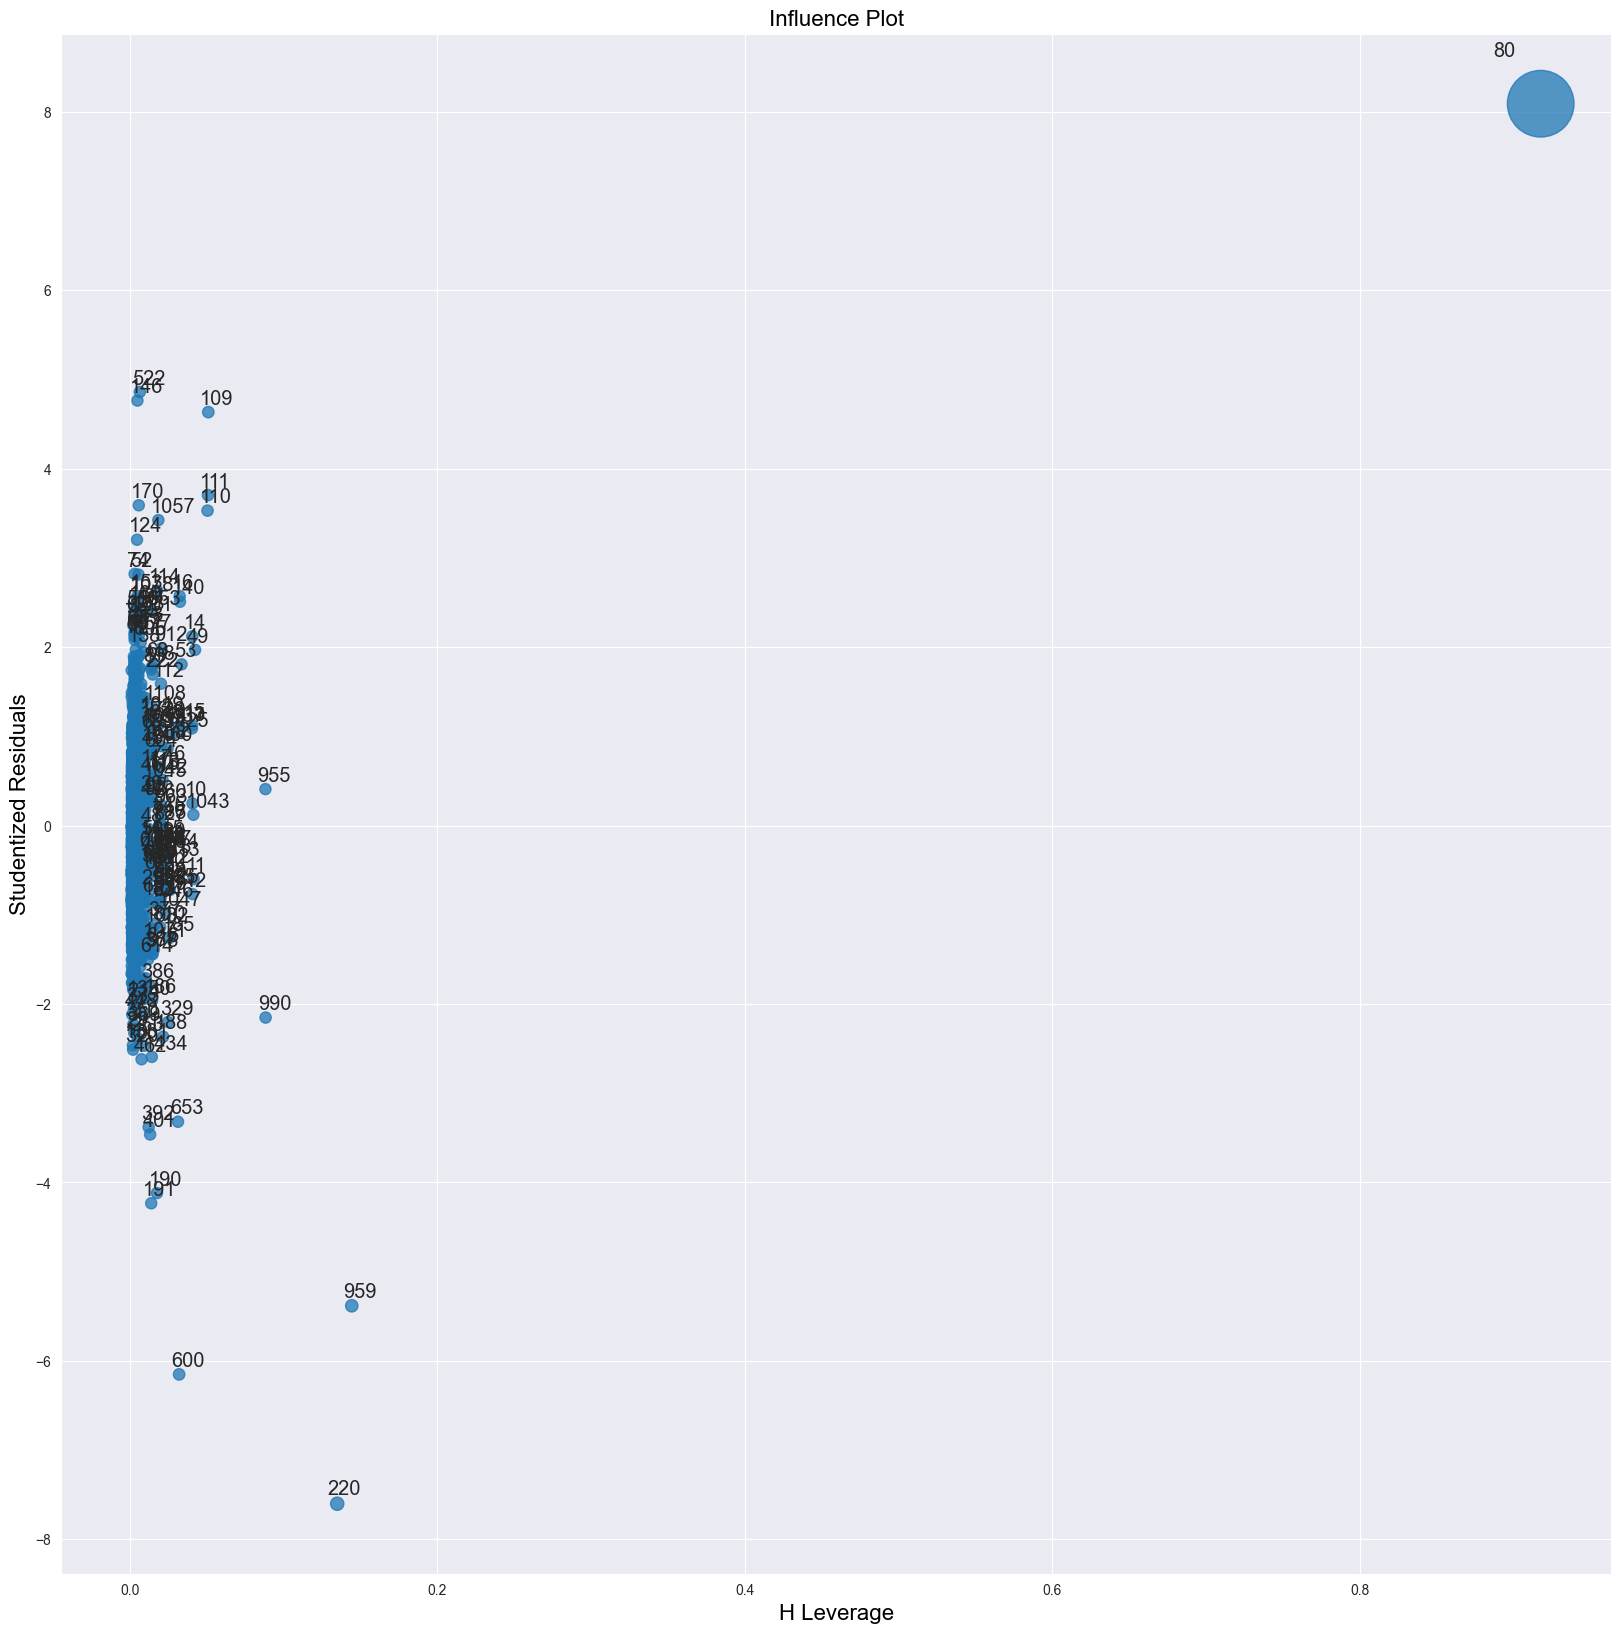

In [39]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)

In [41]:

# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapointsk=toyota4.shape[1]
k=toyota4.shape[1]
n=toyota4.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [42]:
toyota4[toyota4.index.isin([80])]

Price  AGE     KM   HP     CC  Doors  Gears  Quarterly_Tax  Weight
80  18950   25  20019  110  16000      5      5            100    1180

# Improve Model

In [43]:
# creating a copy of data so that can original dataset cannot affected
toyota_new=toyota4.copy()
toyota_new

Price  AGE     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1430   7500   69  20544   86  1300      3      5             69    1025
1431  10845   72  19000   86  1300      3      5             69    1015
1432   8500   71  17016   86  1300      3      5             69    1015
1433   7250   70  16916   86  1300      3      5             69    1015
1434   6950   76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [44]:
# discard the data points which are influencers and reassign the row number (rset_index(drop=TRUE))
toyota5=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota5

Price  AGE     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1429   7500   69  20544   86  1300      3      5             69    1025
1430  10845   72  19000   86  1300      3      5             69    1015
1431   8500   71  17016   86  1300      3      5             69    1015
1432   7250   70  16916   86  1300      3      5             69    1015
1433   6950   76      1  110  1600      5      5             19    1114

[1434 rows x 9 columns]

# Model Deletion Diagnostics and Final Model

In [45]:
while np.max(c)>0.5:

    model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5
else:
    final_model=smf.ols('Price~AGE+KM+HP++CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota5).fit()
    final_model.rsquared,final_model.aic
    print("Thus model Accuracy is improved to",final_model.rsquared)

Thus model Accuracy is improved to 0.8882395145171204


In [46]:
 if np.max(c)>0.5:
    model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota5).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota5=toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota5 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+Quarterly_Tax+Weight',data=toyota5).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [47]:
final_model.rsquared


0.8882395145171204

In [48]:
toyota5

Price  AGE     KM   HP    CC  Doors  Gears  Quarterly_Tax  Weight
0     13500   23  46986   90  2000      3      5            210    1165
1     13750   23  72937   90  2000      3      5            210    1165
2     13950   24  41711   90  2000      3      5            210    1165
3     14950   26  48000   90  2000      3      5            210    1165
4     13750   30  38500   90  2000      3      5            210    1170
...     ...  ...    ...  ...   ...    ...    ...            ...     ...
1426   7500   69  20544   86  1300      3      5             69    1025
1427  10845   72  19000   86  1300      3      5             69    1015
1428   8500   71  17016   86  1300      3      5             69    1015
1429   7250   70  16916   86  1300      3      5             69    1015
1430   6950   76      1  110  1600      5      5             19    1114

[1431 rows x 9 columns]

# Model Prediction

In [49]:
# say New data for prediction is
new_data=pd.DataFrame({'AGE':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

AGE     KM  HP    CC  Doors  Gears  Quarterly_Tax  Weight
0   12  40000  80  1300      4      5             69    1012

In [50]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [51]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(toyota5)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

# Question 2      50 Startup Analysis

In [52]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [53]:
# load dataset
startup=pd.read_csv(r"C:\Users\Asus\Downloads\50_Startups.csv")
startup

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

In [54]:
startup.info

<bound method DataFrame.info of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida

In [55]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [56]:
startup1=startup.rename({'R&D Spend':'RDS','Administration':'ADS','Marketing Spend':'MRS'},axis=1)
startup1

RDS        ADS        MRS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1000.23  124153.04    1903.93    New York   64926.08
46    1315.46  115816.21  297114.46     Florida   49490.75
47       0.00  135426.92       0.00  California   42559.73
48     542.05   51743.15       0.00    New York   35673.41
49       0.00  116983.80   45173.06  California   14681.40

In [57]:
startup1[startup1.duplicated()]

Empty DataFrame
Columns: [RDS, ADS, MRS, State, Profit]
Index: []

In [58]:
startup.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [59]:
# finding the correlation
startup1.corr()

RDS       ADS       MRS    Profit
RDS     1.000000  0.241955  0.724248  0.972900
ADS     0.241955  1.000000 -0.032154  0.200717
MRS     0.724248 -0.032154  1.000000  0.747766
Profit  0.972900  0.200717  0.747766  1.000000

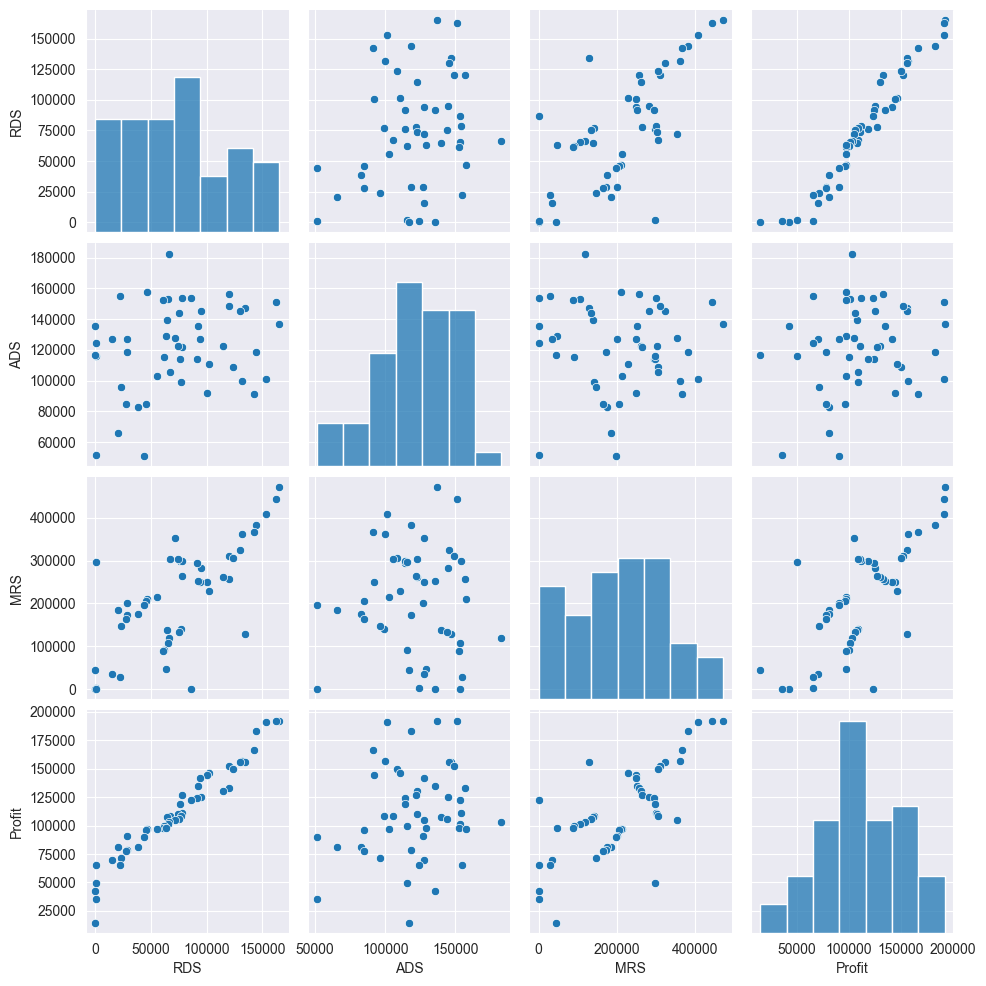

In [60]:
sns.set_style(style='darkgrid')
sns.pairplot(startup1,palette='bright')

# Model building

In [61]:
model=smf.ols("Profit~RDS+ADS+MRS",data=startup1).fit()

# TESTING

In [62]:
# fiding the parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADS             -0.026816
MRS              0.027228
dtype: float64

In [63]:
# Finding tvalues and pvalues
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADS          -0.525507
 MRS           1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADS          0.60176
 MRS          0.10472
 dtype: float64)

In [64]:
# Finding rsquared values
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

In [65]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalue

In [66]:
slr_a=smf.ols("Profit~ADS",data=startup1).fit()
slr_a.pvalues, slr_a.tvalues

(Intercept    0.003824
 ADS          0.162217
 dtype: float64,
 Intercept    3.040044
 ADS          1.419493
 dtype: float64)

In [67]:
slr_m=smf.ols("Profit~MRS",data=startup1).fit()
slr_m.tvalues, slr_m.pvalues

(Intercept    7.808356
 MRS          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MRS          4.381073e-10
 dtype: float64)

In [68]:
mlr_am=smf.ols("Profit~ADS+MRS",data=startup1).fit()
mlr_am.tvalues , mlr_am.pvalues

(Intercept    1.142741
 ADS          2.467779
 MRS          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADS          1.729198e-02
 MRS          9.727245e-11
 dtype: float64)

# Model Validation

In [69]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_r=smf.ols("RDS~ADS+MRS",data=startup1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADS~RDS+MRS",data=startup1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MRS~RDS+ADS",data=startup1).fit().rsquared
vif_m=1/(1-rsq_m)
# Putting the values in Dataframe format
d1={'variables':['RDS','ADS','MRS'],'vif':[vif_r,vif_a,vif_m]}
vif_df=pd.DataFrame(d1)
vif_df


variables       vif
0       RDS  2.468903
1       ADS  1.175091
2       MRS  2.326773

In [70]:
# No variable has vif>20,Nocolinearty,so consider all variables regression equation

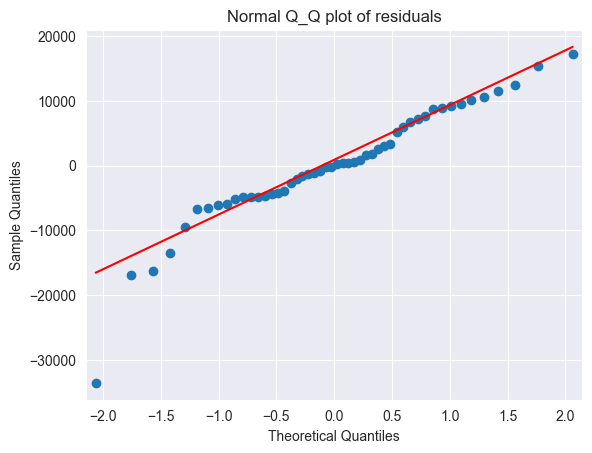

In [71]:
# residual analysis
# test for normality of residuals(Q-Q plot)using residual model(model.resid)
sm.qqplot(model.resid,line='q')
plt.title("Normal Q_Q plot of residuals")
plt.show()

In [72]:
list(np.where(model.resid<-3000))

[array([ 4,  5,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 46, 47, 48, 49],
       dtype=int64)]

In [73]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standard_values(vals)  :return (vals-vals.mean())/vals.std()

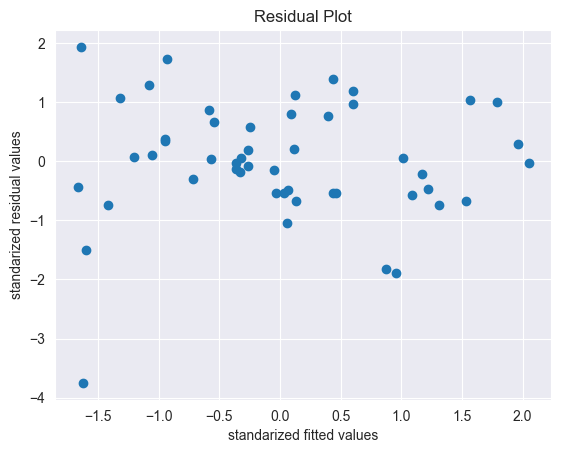

In [74]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()

In [75]:

# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


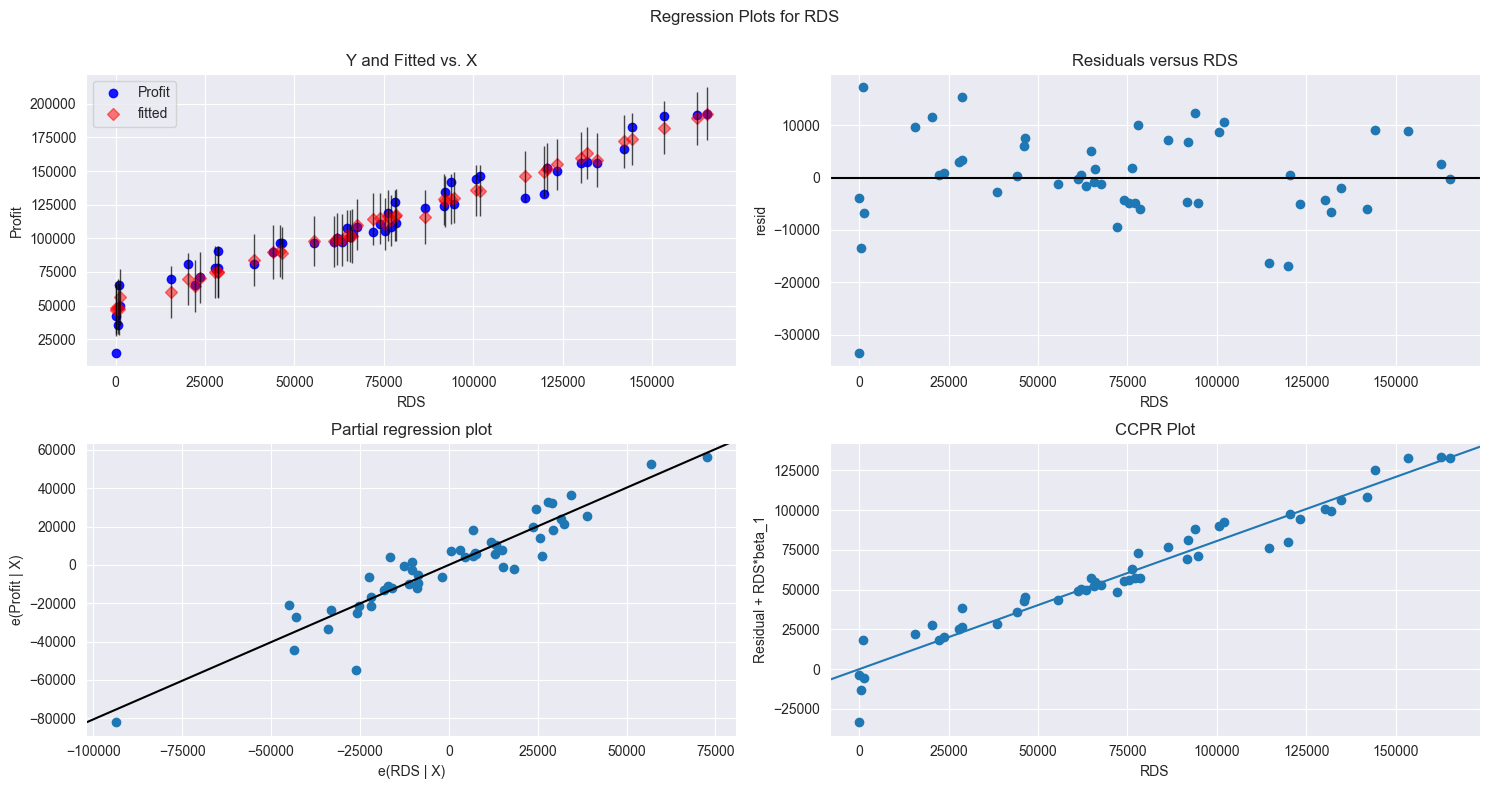

In [76]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


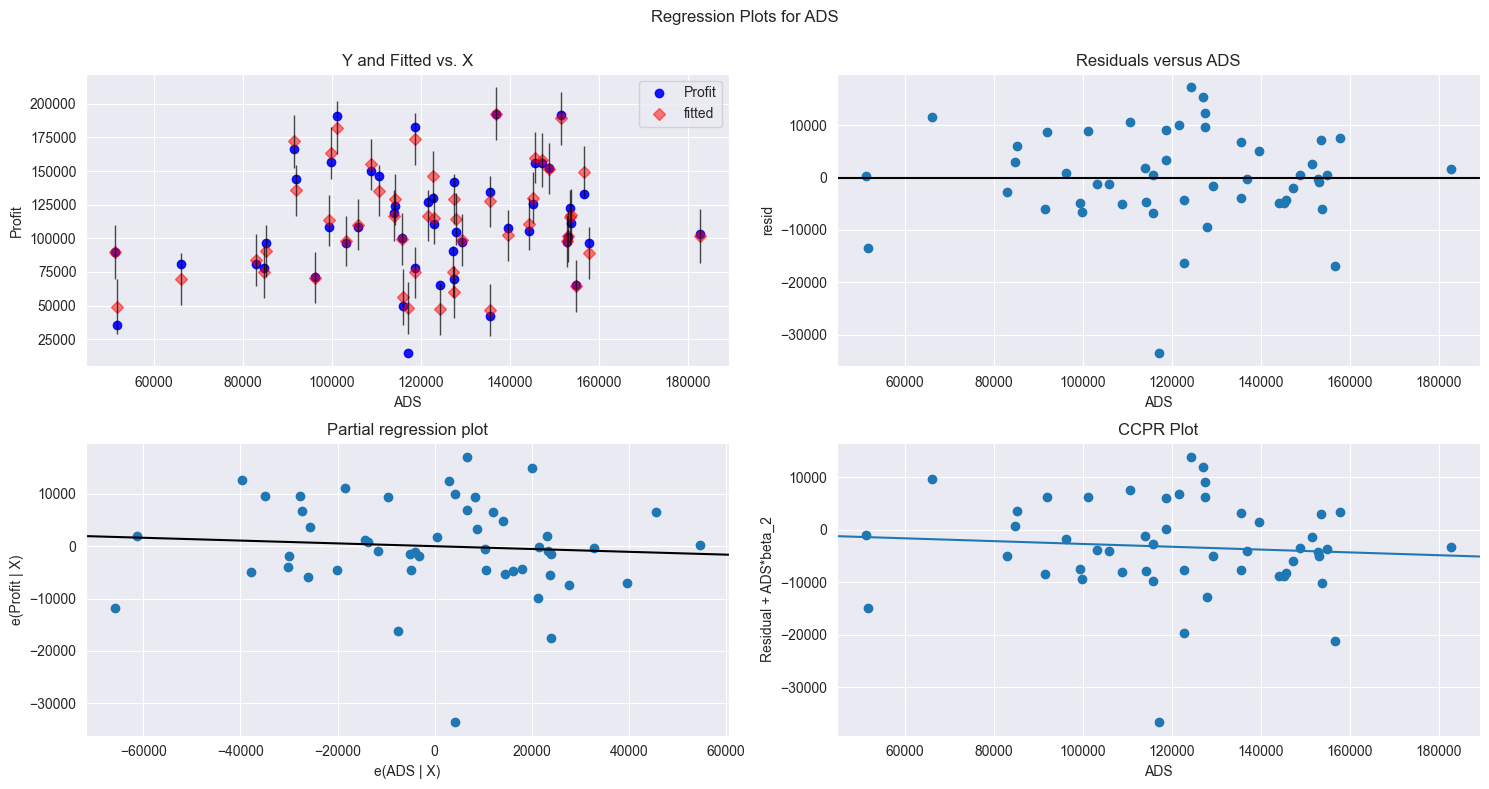

In [77]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADS',fig=fig)
plt.show()

eval_env: 1


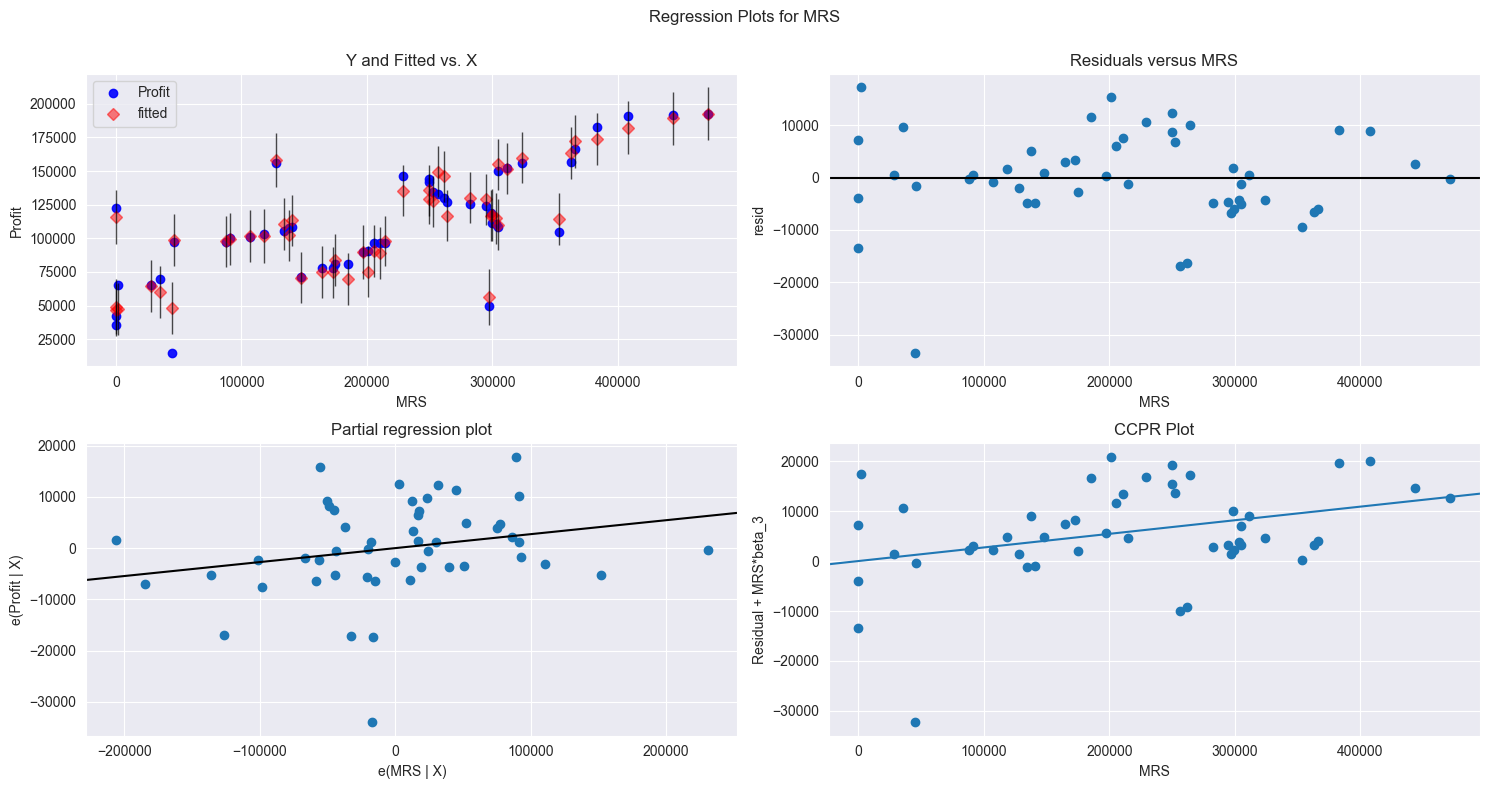

In [78]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MRS',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
# Two Techniques : 1. Cook's Distance & 2. Leverage value

In [79]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

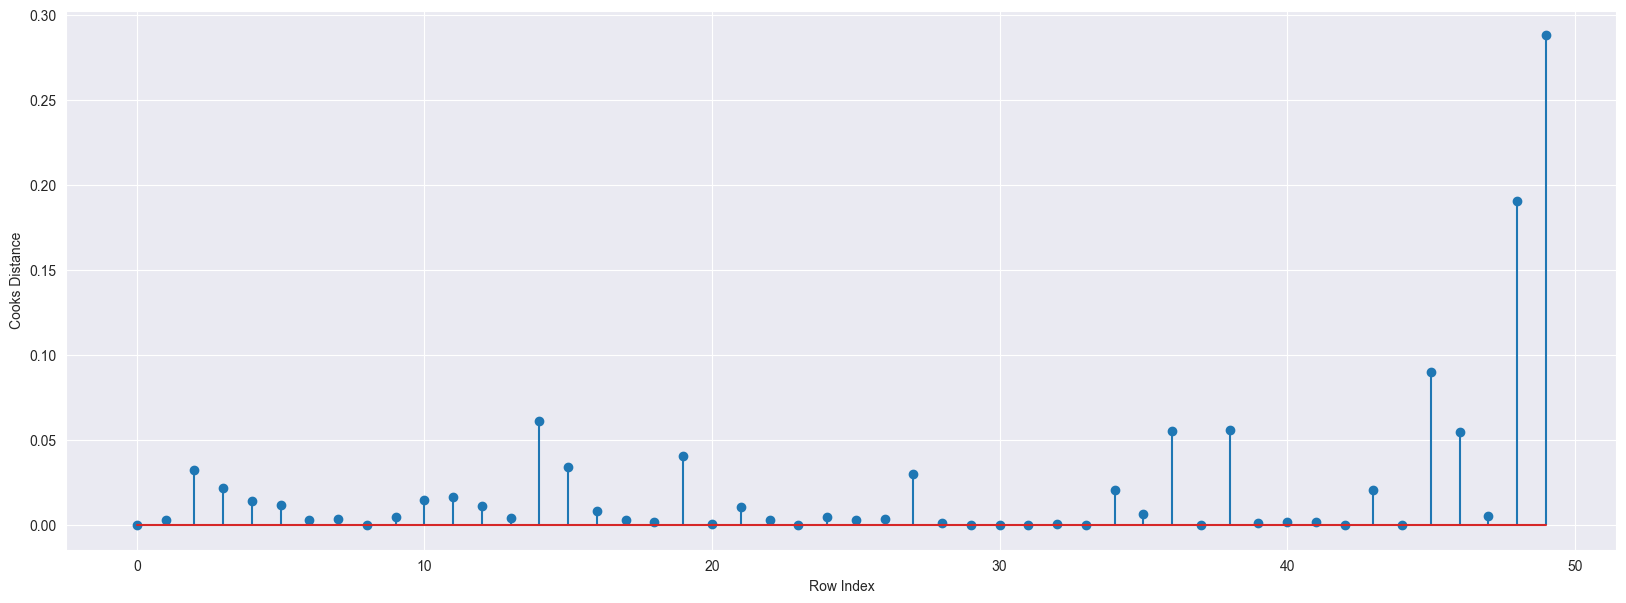

In [80]:
# plot influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [81]:
# index and value of influencer where c>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432634)

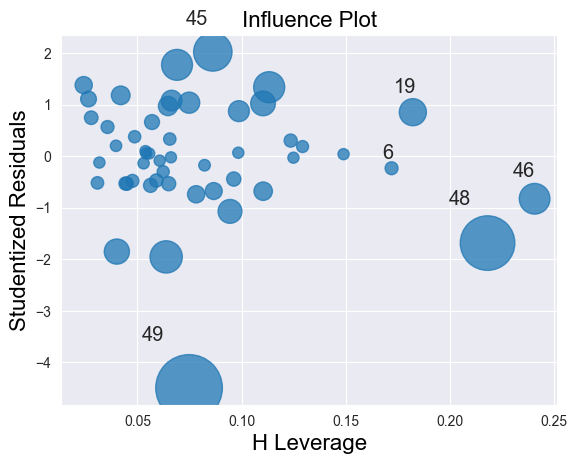

In [82]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [83]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=startup1.shape[1]
n=startup1.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.36

In [84]:
startup1[startup1.index.isin([49])]

RDS       ADS       MRS       State   Profit
49  0.0  116983.8  45173.06  California  14681.4

# Improve the model

In [85]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
startup2=startup1.drop(startup1.index[[49]],axis=0).reset_index(drop=True)
startup2

RDS        ADS        MRS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1000.23  124153.04    1903.93    New York   64926.08
46    1315.46  115816.21  297114.46     Florida   49490.75
47       0.00  135426.92       0.00  California   42559.73
48     542.05   51743.15       0.00    New York   35673.41

# Model Deletion Diagnostics and Final Model

In [86]:
while np.max(c)>0.5:
    model=smf.ols("Profit~RDS+ADS+MRS",data=startup2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c), np.max(c)
    startup2=startup2.drop(startup2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup2
else:
    final_model=smf.ols("Profit~RDS+ADS+MRS",data=startup2).fit()
    final_model.rsquared, final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [87]:
final_model.rsquared

0.9613162435129847

In [88]:
startup2

RDS        ADS        MRS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.84  261776.23    New York  129917.04
16   78013.11  121597.55  264346.06  California  126992.93
17   94657.16  145077.58  282574.31    New York  125370.37
18   91749.16  114175.79  294919.57     Florida  124266.90
19   86419.70  153514.11       0.00    New York  122776.86
20   76253.86  113867.30  298664.47  California  118474.03
21   78389.47  153773.43  299737.29    New York  111313.02
22   73994.56  122782.75  303319.26     Florida  110352.25
23   67532.53  105751.03  304768.73     Florida  108733.99
24   77044.01   99281.34  140574.81    New York  108552.04
25   64664.71  139553.16  137962.62  California  107404.34
26   75328.87  144135.98  134050.07     Florida  105733.54
27   72107.60  127864.55  353183.81    New York  105008.31
28   66051.52  182645.56  118148.20     Florida  103282.38
29   65605.48  153032.06  107138.38    New York  101004.64
30   61994.48  115641.28   91131.24     Florida   99937.59
31   61136.38  152701.92   88218.23    New York   97483.56
32   63408.86  129219.61   46085.25  California   97427.84
33   55493.95  103057.49  214634.81     Florida   96778.92
34   46426.07  157693.92  210797.67  California   96712.80
35   46014.02   85047.44  205517.64    New York   96479.51
36   28663.76  127056.21  201126.82     Florida   90708.19
37   44069.95   51283.14  197029.42  California   89949.14
38   20229.59   65947.93  185265.10    New York   81229.06
39   38558.51   82982.09  174999.30  California   81005.76
40   28754.33  118546.05  172795.67  California   78239.91
41   27892.92   84710.77  164470.71     Florida   77798.83
42   23640.93   96189.63  148001.11  California   71498.49
43   15505.73  127382.30   35534.17    New York   69758.98
44   22177.74  154806.14   28334.72  California   65200.33
45    1000.23  124153.04    1903.93    New York   64926.08
46    1315.46  115816.21  297114.46     Florida   49490.75
47       0.00  135426.92       0.00  California   42559.73
48     542.05   51743.15       0.00    New York   35673.41

# Predictions

In [89]:
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,'ADS':90000,'MRS':140000},index=[0])
new_data

RDS    ADS     MRS
0  70000  90000  140000

In [90]:
# Manual Prediction of Price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [91]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(startup2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# table containing R^2 value for each prepared model

In [92]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

Prep_Models  Rsquared
0        Model  0.950746
1  Final_Model  0.961316